In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('/content/index.csv')

In [5]:
print(data.head(10))

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   
5  2024-03-01  2024-03-01 15:39:47.726      card  ANON-0000-0000-0005   33.8   
6  2024-03-01  2024-03-01 16:19:02.756      card  ANON-0000-0000-0006   38.7   
7  2024-03-01  2024-03-01 18:39:03.580      card  ANON-0000-0000-0007   33.8   
8  2024-03-01  2024-03-01 19:22:01.762      card  ANON-0000-0000-0008   38.7   
9  2024-03-01  2024-03-01 19:23:15.887      card  ANON-0000-0000-0008   33.8   

           coffee_name  
0                Latte  
1        Hot Chocolate  
2        Hot Chocolate  
3            Americ

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [7]:
data.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [8]:
data['datetime']=pd.to_datetime(data['datetime'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   object        
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 53.2+ KB


In [10]:
data.describe(include='object')

,date,cash_type,card,coffee_name
count,1133,1133,1044,1133
unique,150,2,446,8
top,2024-07-30,card,ANON-0000-0000-0012,Americano with Milk
freq,24,1044,88,268


<Axes: >

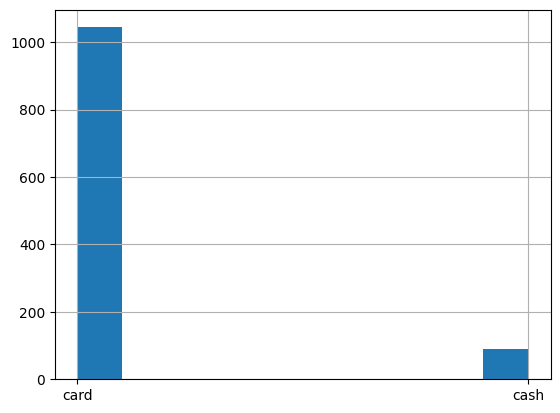

In [11]:
data['cash_type'].hist()

In [12]:
data[data['card'].isnull()]['cash_type'].value_counts()

,count
cash_type,
cash,89


In [13]:
data['cash_type'].value_counts(normalize=True)

,proportion
cash_type,
card,0.921447
cash,0.078553


In [14]:
pd.DataFrame(data['coffee_name'].value_counts(normalize=True).sort_values(ascending=False).round(4)*100)

,proportion
coffee_name,
Americano with Milk,23.65
Latte,21.45
Cappuccino,17.30
Americano,14.92
Cortado,8.74
Hot Chocolate,6.53
Espresso,4.32
Cocoa,3.09


In [15]:
data['date']=pd.to_datetime(data['date'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 53.2+ KB


In [17]:
data['month']=data['date'].dt.strftime('%Y-%m')
data['day']=data['date'].dt.strftime('%w')
data['hour']=data['datetime'].dt.strftime('%H')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 79.8+ KB


In [19]:
data.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,5,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03,5,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03,5,13


In [20]:
data['date'].min() , data['date'].max()

(Timestamp('2024-03-01 00:00:00'), Timestamp('2024-07-31 00:00:00'))

In [21]:
revenue_data=data.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)

Text(0.5, 0, 'revenue')

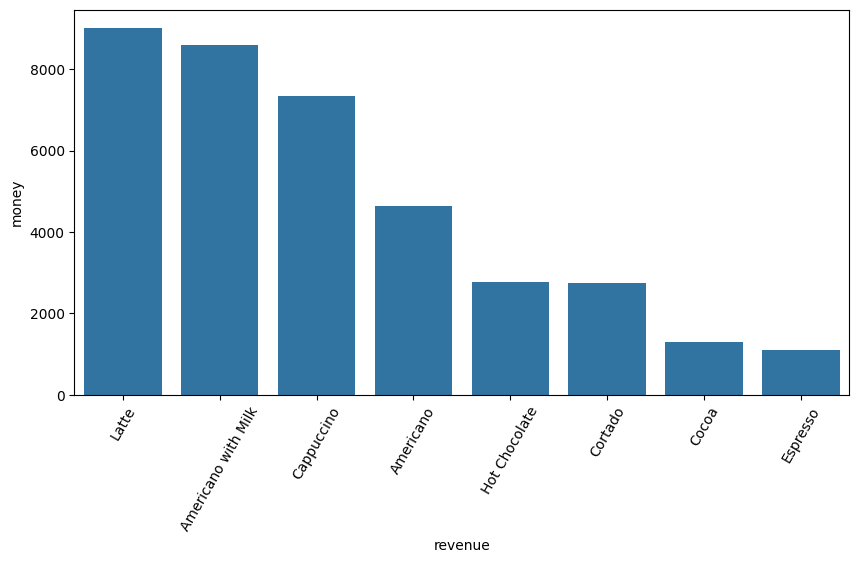

In [22]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='coffee_name',y='money',data=revenue_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.xlabel('revenue')

In [23]:
monthly_sales=data.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03,36,34,20,6,30,10,22,48
1,2024-04,35,42,43,6,19,7,13,31
2,2024-05,48,58,55,9,17,8,14,58
3,2024-06,14,69,46,5,19,10,14,50
4,2024-07,36,65,32,9,14,14,11,56


In [24]:
monthly_sales.describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,11.0,22.0
Latte,31.0,58.0


([<matplotlib.axis.XTick at 0x7cc4ebc7d350>,
 [Text(0, 0, '2024-03'),
  Text(1, 0, '2024-04'),
  Text(2, 0, '2024-05'),
  Text(3, 0, '2024-06'),
  Text(4, 0, '2024-07')])

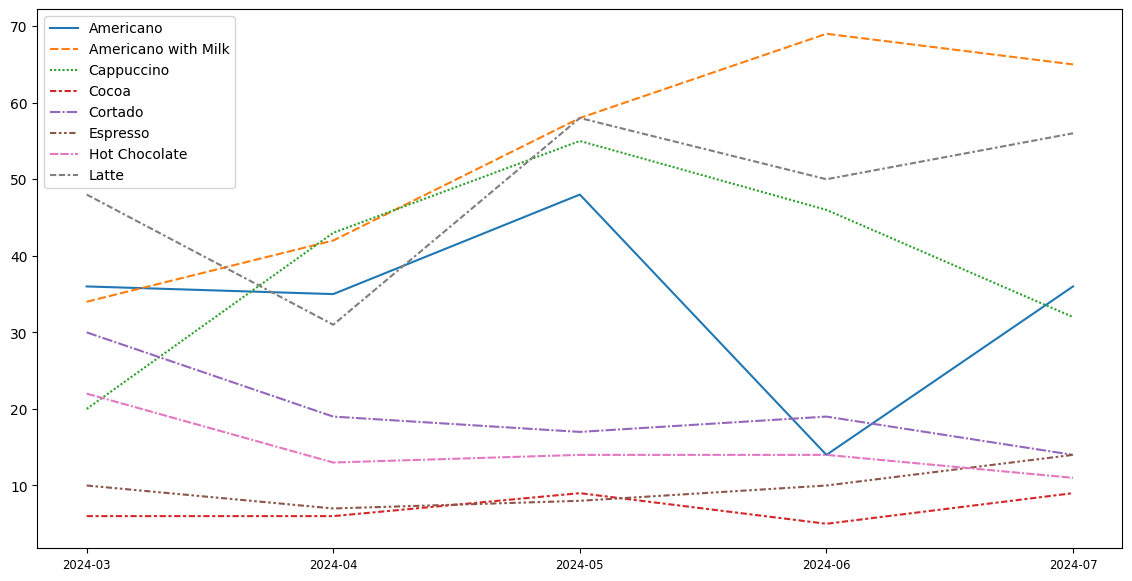

In [25]:
plt.figure(figsize=(14,7))
sns.lineplot(data=monthly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])),monthly_sales['month'],size='small')

In [26]:
data.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,5,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03,5,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03,5,13


In [27]:
weekday_sales=data.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales

,day,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


([<matplotlib.axis.XTick at 0x7cc4e9105710>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

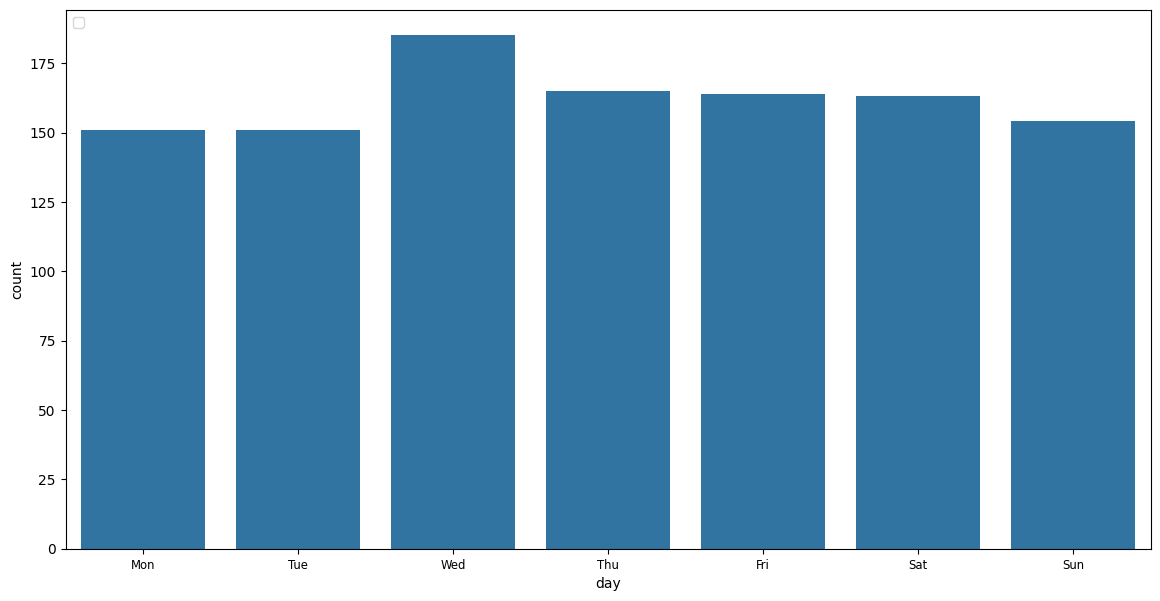

In [30]:
plt.figure(figsize=(14,7))
sns.barplot(data=weekday_sales,x='day',y='count')
plt.xticks(range(len(weekday_sales['day'])),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],size='small')

In [31]:
data.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,5,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03,5,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03,5,13


In [32]:
daily_sales=data.groupby(['coffee_name','date']).count()['datetime'].reset_index().rename(columns={'datetime':'count'}).pivot(index='date',columns='coffee_name',values='count').reset_index()
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,NaN,1.0,NaN,NaN,3.0,2.0
1,2024-03-02,3.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0
2,2024-03-03,1.0,2.0,NaN,1.0,2.0,NaN,2.0,2.0
3,2024-03-04,NaN,1.0,NaN,NaN,NaN,1.0,NaN,2.0
4,2024-03-05,NaN,NaN,NaN,1.0,1.0,NaN,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,NaN,5.0,4.0,NaN,NaN,2.0,NaN,2.0
146,2024-07-28,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,NaN,NaN,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,NaN,3.0,2.0,NaN,3.0


In [37]:
daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,1.0,5.0
Americano with Milk,1.0,12.0
Cappuccino,1.0,9.0
Cocoa,1.0,2.0
Cortado,1.0,4.0
Espresso,1.0,4.0
Hot Chocolate,1.0,4.0
Latte,1.0,7.0


In [39]:
hourly_sales=data.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
hourly_sales

,hour,count
0,07,13
1,08,44
2,09,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


([<matplotlib.axis.XTick at 0x7cc4e24221d0>,
 [Text(0, 0, '07'),
  Text(1, 0, '08'),
  Text(2, 0, '09'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '16'),
  Text(10, 0, '17'),
  Text(11, 0, '18'),
  Text(12, 0, '19'),
  Text(13, 0, '20'),
  Text(14, 0, '21'),
  Text(15, 0, '22')])

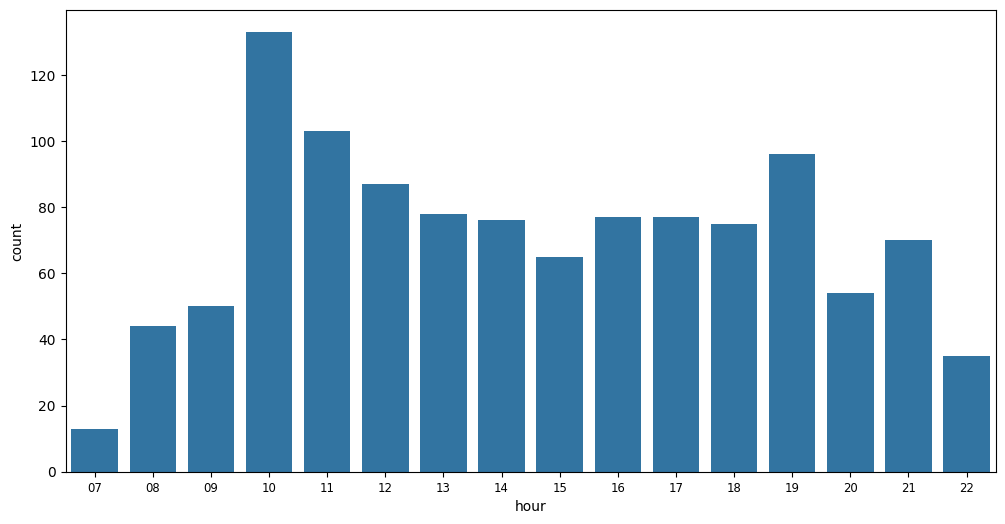

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(data=hourly_sales,x='hour',y='count')
plt.xticks(range(len(hourly_sales['hour'])),hourly_sales['hour'],size='small')


In [44]:
hourly_sales_by_coffee=data.groupby(['hour','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='hour',columns='coffee_name',values='count').reset_index()
hourly_sales_by_coffee

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,07,5.0,4.0,1.0,NaN,1.0,NaN,NaN,2.0
1,08,10.0,7.0,8.0,1.0,6.0,NaN,NaN,12.0
2,09,8.0,16.0,6.0,1.0,5.0,3.0,NaN,11.0
3,10,20.0,31.0,10.0,4.0,8.0,2.0,7.0,51.0
4,11,21.0,25.0,16.0,1.0,13.0,6.0,8.0,13.0
5,12,14.0,26.0,15.0,3.0,7.0,6.0,3.0,13.0
6,13,18.0,18.0,10.0,2.0,12.0,3.0,4.0,11.0
7,14,15.0,18.0,13.0,4.0,6.0,5.0,2.0,13.0
8,15,14.0,15.0,8.0,NaN,3.0,4.0,6.0,15.0
9,16,10.0,18.0,12.0,3.0,12.0,5.0,4.0,13.0


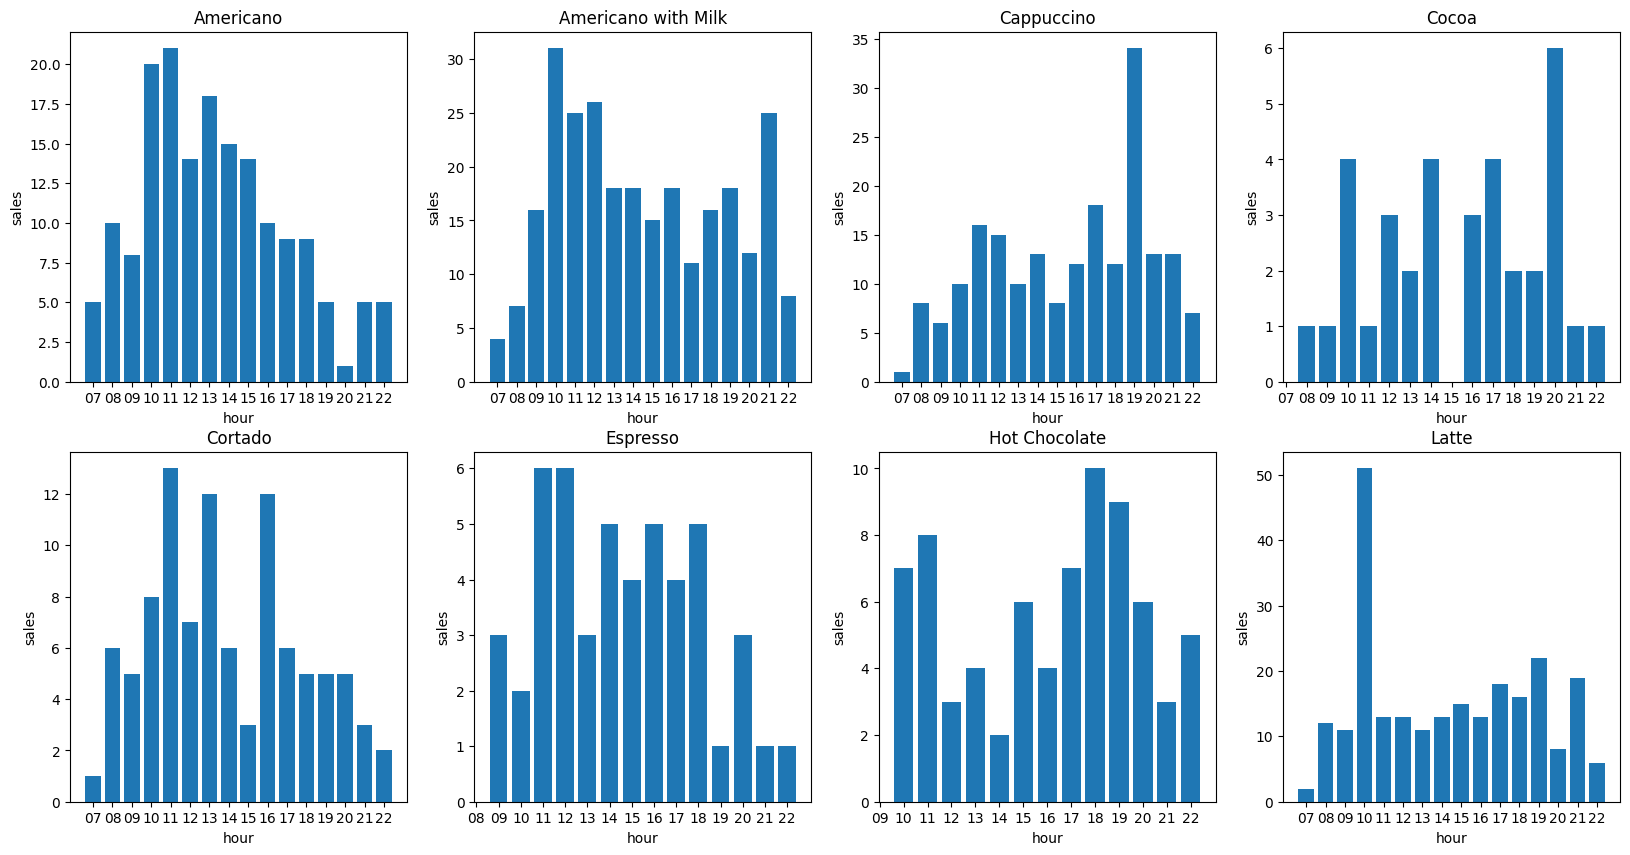

In [56]:
fig,axs=plt.subplots(2,4,figsize=(20,10))
axs=axs.flatten()

for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):
  axs[i].bar(hourly_sales_by_coffee['hour'],hourly_sales_by_coffee[column])
  axs[i].set_title(f'{column}')
  axs[i].set_xlabel('hour')
  axs[i].set_ylabel('sales')


**From the analysis above, we have uncovered valuable insights into customer
shopping patterns on a daily and weekly basis. We have identified the most
popular coffee products and observed the shopping trends over time. These
findings are instrumental in optimizing inventory planning, designing the
layout of vending machines, and determining the ideal restock times for coffee
products.**